## EDA Automation (First Finding AI based Insights)

In [1]:
pip install gradio

  Using cached httpx-0.28.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached httpcore-1.0.9-py3-none-any.whl.metadata (21 kB)
  Using cached h11-0.16.0-py3-none-any.whl.metadata (8.3 kB)
Using cached httpx-0.28.1-py3-none-any.whl (73 kB)
Using cached httpcore-1.0.9-py3-none-any.whl (78 kB)
Using cached h11-0.16.0-py3-none-any.whl (37 kB)

  Attempting uninstall: h11

    Found existing installation: h11 0.12.0

    Uninstalling h11-0.12.0:

      Successfully uninstalled h11-0.12.0

   ---------------------------------------- 0/3 [h11]
  Attempting uninstall: httpcore
   ---------------------------------------- 0/3 [h11]
    Found existing installation: httpcore 0.13.3
   ---------------------------------------- 0/3 [h11]
    Uninstalling httpcore-0.13.3:
   ---------------------------------------- 0/3 [h11]
      Successfully uninstalled httpcore-0.13.3
   ---------------------------------------- 0/3 [h11]
   ------------- -------------------------- 1/3 [httpcore]
   ------------- --

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
googletrans 3.1.0a0 requires httpx==0.13.3, but you have httpx 0.28.1 which is incompatible.


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
url=r"C:\Users\Dhanwantari Devre\VS CODE PROJECTS\0.TESTING\2...EDA LLM\titanic_ dataset_final.csv"
df=pd.read_csv(url)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [8]:
print("Missing Valuees = \n",df.isnull().sum())

Missing Valuees = 
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Text(0.5, 1.0, 'Survived Count')

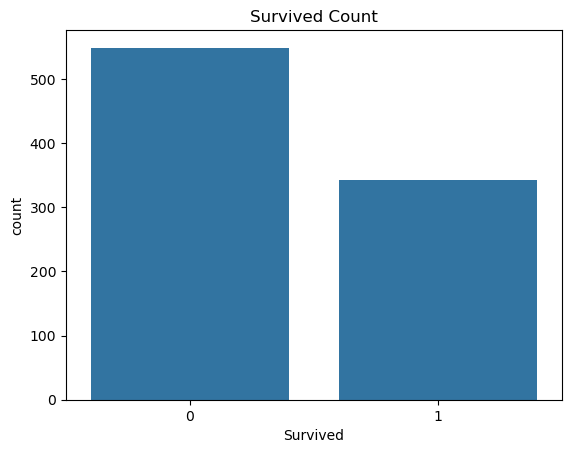

In [9]:
sns.countplot(x='Survived',data=df)
plt.title("Survived Count")

In [10]:
import ollama
def generate_insights(df_summary):
    prompt = f"Analyze the dataset summary and provide insights:\n\n{df_summary}"
    response = ollama.chat(model="mistral", messages=[{"role": "user", "content": prompt}])
    return response['message']['content']
# Generate AI Insights
summary = df.describe().to_string()
insights = generate_insights(summary)
print("\n🔹 AI-Generated Insights:\n", insights)


🔹 AI-Generated Insights:
  The dataset is the Titanic Passenger data, which contains information about passengers who boarded the RMS Titanic on its maiden voyage from Southampton to New York in 1912. Here are some insights based on the provided summary:

1. There were a total of 891 passengers, with every passenger having an entry for each variable.

2. The average (mean) value for `Survived` is 0.383838, indicating that slightly less than half of the passengers survived.

3. Passengers belonged to different classes: 1st class (Pclass=1), 2nd class (Pclass=2), and 3rd class (Pclass=3). The mean Pclass is 2.308642, suggesting that most of the passengers were from 2nd class.

4. The average age is 29.699118 years, with a standard deviation of 14.526497, indicating a relatively wide range in ages.

5. On average, each passenger had 0.523 siblings (SibSp) and 0.381594 parents/guardians (Parch) traveling with them.

6. The average fare paid by passengers was 32.204208, with a standard dev

In [11]:
import gradio as gr

def greet(name):
    return "Hello " + name + "!"

demo = gr.Interface(fn=greet, inputs="text", outputs="text")
demo.launch()   

* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


In [12]:
import gradio as gr

def eda_analysis(file):
    df = pd.read_csv(file.name)
    summary = df.describe().to_string()
    insights = generate_insights(summary)
    return insights

# Create Web Interface
demo = gr.Interface(fn=eda_analysis, inputs="file", outputs="text", title="AI-Powered EDA with Mistral")

# Launch App
demo.launch(share=True)  # Use share=True for Google Colab



* Running on local URL:  http://127.0.0.1:7861

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.


Created dataset file at: .gradio\flagged\dataset2.csv
